In [ ]:
 from google.colab import drive
drive.mount('/content/drive/',force_remount=False)

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Attacks"

/content/drive/MyDrive/Attacks


# **Without Attack**

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/ratings.csv")
mr = shuffle(mr)
mr.head(10)

,userId,movieId,rating,timestamp
39822,274,3786,3.5,1171932269
31231,217,2012,2.0,955944596
52040,339,1101,2.5,1460183145
55147,365,134130,3.5,1488332624
24760,173,357,5.0,843398045
69868,448,78467,2.0,1315467254
68678,448,150,3.0,1019137611
57420,380,5093,4.0,1494267624
37441,250,3418,5.0,1121217515
68272,441,10,4.5,1449070452


In [ ]:
import pandas as pd
from sklearn.utils import shuffle

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/ratings.csv")
mr = shuffle(mr)
mr.rename(columns = {'movieId':'ItemID'}, inplace = True)
mr.rename(columns = {'userId':'UserID'}, inplace = True)
mr.rename(columns = {'rating':'Rating'}, inplace = True)

mr= mr.drop("timestamp",axis=1)
mr.head(10)

,UserID,ItemID,Rating
80119,503,3095,3.5
42627,288,2617,2.0
90984,590,3988,2.5
71812,462,5902,3.5
28175,195,2006,4.0
77617,483,4816,5.0
40672,275,1213,5.0
91958,596,8665,3.5
98374,606,36535,4.0
12593,80,6281,3.5


In [ ]:
mapping = {item:i for i, item in enumerate(mr["UserID"].unique())}
mr["UserID"] = mr["UserID"].apply(lambda x: mapping[x])

mapping = {item:i for i, item in enumerate(mr["ItemID"].unique())}
mr["ItemID"] = mr["ItemID"].apply(lambda x: mapping[x])
mr.head(10)

,UserID,ItemID,Rating
80119,0,0,3.5
42627,1,1,2.0
90984,2,2,2.5
71812,3,3,3.5
28175,4,4,4.0
77617,5,5,5.0
40672,6,6,5.0
91958,7,7,3.5
98374,8,8,4.0
12593,9,9,3.5


In [ ]:
len(mr.UserID.unique()), len(mr.ItemID.unique())

(610, 9724)

In [ ]:
mr[['Rating']] = mr[['Rating']].astype({'Rating': float})
mr.dtypes

UserID      int64
ItemID      int64
Rating    float64
dtype: object

In [ ]:
fname = '/content/drive/MyDrive/Attacks/dataset/MR_main.csv'
mr.to_csv(fname, index=False)

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193626 sha256=5cf15655028291f5e770d348097796435b59f3ecfac1cb71e82de8da8ee6979f
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
# Load Reader library
reader = Reader()

In [ ]:
# Load ratings dataset with Dataset library
datamr = Dataset.load_from_df(mr[['UserID', 'ItemID', 'Rating']], reader)
# test set is made of 20% of the ratings.
trainset,testset = train_test_split(datamr, test_size=0.40, train_size=0.60)
# Use the SVD algorithm.
svdOG = SVD()
# Train the algorithm on the trainset, and predict ratings for the testset
svdOG.fit(trainset)
predictions = svdOG.test(testset)
print(predictions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8858


0.8857723960347966

In [ ]:
testdf = pd.DataFrame(testset,columns=['UserID',"ItemID","Rating"])

In [ ]:
reader = Reader()
testset = Dataset.load_from_df(testdf,reader)

In [ ]:
# Run 5-fold cross-validation and print results.
cross_validate(svdOG, testset, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9073  0.9144  0.8950  0.9072  0.9016  0.9051  0.0065  
Fit time          0.77    1.28    0.45    0.45    0.56    0.70    0.31    
Test time         0.09    0.07    0.06    0.23    0.10    0.11    0.06    


{'test_rmse': array([0.90733297, 0.91442454, 0.89498767, 0.90719898, 0.90161742]),
 'fit_time': (0.774406909942627,
  1.2788851261138916,
  0.4450643062591553,
  0.4492793083190918,
  0.5594415664672852),
 'test_time': (0.08972454071044922,
  0.07097649574279785,
  0.05917668342590332,
  0.22586798667907715,
  0.09513449668884277)}

# **Warming up**

In [ ]:
!ls

"Anushka'sMA.ipynb"   bandwagonAttack.py   getTargetsItem.py    RMSE3
 attackDataset	      config		   main.py	       'Rmse bar'
 attack.py	      dataset		   MovieAttacks.ipynb   shillingfile.py
 averageAttack.py     GANattack.py	   __pycache__


In [ ]:
import os.path
class Config(object):
    def __init__(self,fileName):
        self.config = {}
        self.readConfiguration(fileName)

    def __getitem__(self, item):
        if not self.contains(item):
            print('parameter '+item+' is invalid!')
            exit(-1)
        return self.config[item]

    def getOptions(self,item):
        if not self.contains(item):
            print('parameter '+item+' is invalid!')
            exit(-1)
        return self.config[item]

    def contains(self,key):
        return self.config.__contains__(key)

    def readConfiguration(self,fileName):
        path = fileName
        print(path)
        if not os.path.exists(path):
            print('config file is not found!')
            raise IOError
        with open(path) as f:
            for ind,line in enumerate(f):
                if line.strip()!='':
                    try:
                        key,value=line.strip().split('=')
                        self.config[key]=value
                    except ValueError:
                        print('config file is not in the correct format! Error Line:%d'%(ind))

class LineConfig(object):
    def __init__(self,content):
        self.line = content.strip().split(' ')
        self.options = {}
        self.mainOption = False
        if self.line[0] == 'on':
            self.mainOption = True
        elif self.line[0] == 'off':
            self.mainOption = False
        for i,item in enumerate(self.line):
            if (item.startswith('-') or item.startswith('--')) and  not item[1:].isdigit():
                ind = i+1
                for j,sub in enumerate(self.line[ind:]):
                    if (sub.startswith('-') or sub.startswith('--')) and  not sub[1:].isdigit():
                        ind = j
                        break
                    if j == len(self.line[ind:])-1:
                        ind=j+1
                        break
                try:
                    self.options[item] = ' '.join(self.line[i+1:i+1+ind])
                except IndexError:
                    self.options[item] = 1


    def __getitem__(self, item):
        if not self.contains(item):
            print('parameter '+item+' is invalid!')
            exit(-1)
        return self.options[item]

    def getOption(self,key):
        if not self.contains(key):
            print('parameter '+key+' is invalid!')
            exit(-1)
        return self.options[key]

    def isMainOn(self):
        return self.mainOption

    def contains(self,key):
        return self.options.__contains__(key)


In [ ]:
import os.path
from os import makedirs,remove
from re import compile,findall,split
#from config import LineConfig
from collections import defaultdict
class FileIO(object):
    def __init__(self):
        pass

    def writeFile(dir,file,content,op = 'w'):
        if not os.path.exists(dir):
            os.makedirs(dir)
        if type(content)=='str':
            with open(dir + file, op) as f:
                f.write(content)
        else:
            with open(dir+file,op) as f:
                f.writelines(content)

    def deleteFile(filePath):
        if os.path.exists(filePath):
            remove(filePath)

    def loadDataSet(conf, file, bTest=False):
        trainingData = defaultdict(dict)
        testData = defaultdict(dict)
        ratingConfig = LineConfig(conf['ratings.setup'])
        if not bTest:
            print('loading training data...')
        else:
            print('loading test data...')
        with open(file) as f:
            ratings = f.readlines()
        # ignore the headline
        if ratingConfig.contains('-header'):
            ratings = ratings[1:]
        # order of the columns
        order = ratingConfig['-columns'].strip().split()

        for lineNo, line in enumerate(ratings):
            items = split(' |,|\t', line.strip())
            if not bTest and len(order) < 3:
                print('The rating file is not in a correct format. Error: Line num %d' % lineNo)
                exit(-1)    
            try:
                userId = items[int(order[0])]
                itemId = items[int(order[1])]
                if bTest and len(order)<3:
                    rating = 1 #default value
                else:
                    rating  = items[int(order[2])]

            except ValueError:
                print('Error! Have you added the option -header to the rating.setup?')
                exit(-1)
            if not bTest:
                trainingData[userId][itemId]=float(rating)
            else:
                testData[userId][itemId] = float(rating)
        if not bTest:
            return trainingData
        else:
            return testData

    def loadRelationship(conf, filePath):
        socialConfig = LineConfig(conf['social.setup'])
        relation = []
        print('loading social data...')
        with open(filePath) as f:
            relations = f.readlines()
            # ignore the headline
        if socialConfig.contains('-header'):
            relations = relations[1:]
        # order of the columns
        order = socialConfig['-columns'].strip().split()
        if len(order) <= 2:
            print('The social file is not in a correct format.')
        for lineNo, line in enumerate(relations):
            items = split(' |,|\t', line.strip())
            if len(order) < 2:
                print('The social file is not in a correct format. Error: Line num %d' % lineNo)
                exit(-1)
            userId1 = items[int(order[0])]
            userId2 = items[int(order[1])]
            if len(order) < 3:
                weight = 1
            else:
                weight = float(items[int(order[2])])
            relation.append([userId1, userId2, weight])
        return relation


    def loadLabels(filePath):
        labels = {}
        with open(filePath) as f:
            for line in f:
                items = split(' |,|\t', line.strip())
                labels[items[0]] = items[1]
        return labels

In [ ]:
import os.path
from os import makedirs,remove
from re import compile,findall,split
from collections import defaultdict
class FileIO(object):
    def __init__(self):
        pass

    def writeFile(dir,file,content,op = 'w'):
        if not os.path.exists(dir):
            os.makedirs(dir)
        if type(content)=='str':
            with open(dir + file, op) as f:
                f.write(content)
        else:
            with open(dir+file,op) as f:
                f.writelines(content)

    def deleteFile(filePath):
        if os.path.exists(filePath):
            remove(filePath)

    def loadDataSet(conf, file, bTest=False):
        trainingData = defaultdict(dict)
        testData = defaultdict(dict)
        ratingConfig = LineConfig(conf['ratings.setup'])
        if not bTest:
            print('loading training data...')
        else:
            print('loading test data...')
        with open(file) as f:
            ratings = f.readlines()
        # ignore the headline
        if ratingConfig.contains('-header'):
            ratings = ratings[1:]
        # order of the columns
        order = ratingConfig['-columns'].strip().split()

        for lineNo, line in enumerate(ratings):
            items = split(' |,|\t', line.strip())
            if not bTest and len(order) < 3:
                print('The rating file is not in a correct format. Error: Line num %d' % lineNo)
                exit(-1)    
            try:
                userId = items[int(order[0])]
                itemId = items[int(order[1])]
                if bTest and len(order)<3:
                    rating = 1 #default value
                else:
                    rating  = items[int(order[2])]

            except ValueError:
                print('Error! Have you added the option -header to the rating.setup?')
                exit(-1)
            if not bTest:
                trainingData[userId][itemId]=float(rating)
            else:
                testData[userId][itemId] = float(rating)
        if not bTest:
            return trainingData
        else:
            return testData

    def loadRelationship(conf, filePath):
        socialConfig = LineConfig(conf['social.setup'])
        relation = []
        print('loading social data...')
        with open(filePath) as f:
            relations = f.readlines()
            # ignore the headline
        if socialConfig.contains('-header'):
            relations = relations[1:]
        # order of the columns
        order = socialConfig['-columns'].strip().split()
        if len(order) <= 2:
            print('The social file is not in a correct format.')
        for lineNo, line in enumerate(relations):
            items = split(' |,|\t', line.strip())
            if len(order) < 2:
                print('The social file is not in a correct format. Error: Line num %d' % lineNo)
                exit(-1)
            userId1 = items[int(order[0])]
            userId2 = items[int(order[1])]
            if len(order) < 3:
                weight = 1
            else:
                weight = float(items[int(order[2])])
            relation.append([userId1, userId2, weight])
        return relation

    def loadLabels(filePath):
        labels = {}
        with open(filePath) as f:
            for line in f:
                items = split(' |,|\t', line.strip())
                labels[items[0]] = items[1]
        return labels

# **Attack Class**

In [ ]:
from collections import defaultdict
import numpy as np
import random
import os
from os.path import abspath

class Attack(object):
    def __init__(self,conf):
        self.config = Config(conf)
        self.userProfile = FileIO.loadDataSet(self.config,self.config['ratings'])
        self.itemProfile = defaultdict(dict)
        self.attackSize = float(self.config['attackSize'])
        self.fillerSize = float(self.config['fillerSize'])
        self.selectedSize = float(self.config['selectedSize'])
        self.targetCount = int(self.config['targetCount'])
        self.targetScore = float(self.config['targetScore'])
        self.threshold = float(self.config['threshold'])
        self.minCount = int(self.config['minCount'])
        self.maxCount = int(self.config['maxCount'])
        self.minScore = float(self.config['minScore'])
        self.maxScore = float(self.config['maxScore'])
        self.outputDir = self.config['outputDir']
        if not os.path.exists(self.outputDir):
            os.makedirs(self.outputDir)
        for user in self.userProfile:
            for item in self.userProfile[user]:
                self.itemProfile[item][user] = self.userProfile[user][item]
        self.spamProfile = defaultdict(dict)
        self.spamItem = defaultdict(list) #items rated by spammers
        self.targetItems = []
        self.itemAverage = {}
        self.getAverageRating()
        self.selectTarget()
        self.startUserID = 0

    # def selectTarget(count = 20):
    #     pass
    # def reload(self):
    #     self.userProfile, self.itemProfile = loadRatings(self.config['ratings'])
    #     self.spamProfile = defaultdict(dict)
    #     self.spamItem = defaultdict(list)

    def getAverageRating(self):
        for itemID in self.itemProfile:
            li = self.itemProfile[itemID].values()
            self.itemAverage[itemID] = float(sum(li)) / len(li)


    def selectTarget(self,):
        print('Selecting target items...')
        #print('-')*80
        print('Target item       Average rating of the item')
        itemList = list(self.itemProfile.keys())
        sorted(itemList)
        targets = []
        '''
        with open('targets.txt') as f:
            content = f.readlines()
            for item in content:
                item = item.strip('\n')
                targets.append(item)
        #targets = ['3863','1388','1920','2084','204','2088','8861','99112','291','33836','1241','3705','5106','7367','46530','2402','102','2088','2709','1848']

        #targets = []
        #haha = []
        '''
        targets = ['3863','1388','1920','2084','204','2088','8861','291','5106','102']
        # while len(self.targetItems) < self.targetCount:
        #     target = np.random.randint(len(itemList)) #generate a target order at random
            

        #     if len(self.itemProfile[str(itemList[target])]) < self.maxCount and len(self.itemProfile[str(itemList[target])]) > self.minCount \
        #             and str(itemList[target]) not in self.targetItems \
        #             and self.itemAverage[str(itemList[target])] <= self.threshold:
        #         self.targetItems.append(str(itemList[target]))
        #         haha.append(itemList[target])
        #         targets.append(itemList[target] + '\n')
        #         print(str(itemList[target]),'                  ',self.itemAverage[str(itemList[target])])
        
        for item in targets:
            self.targetItems.append(int(item))
            print(str(item),'                  ',self.itemAverage[str(item)])
        print(self.targetItems)
        
        
    def getFillerItems(self):
        mu = int(self.fillerSize*len(self.itemProfile))
        sigma = int(0.1*mu)
        markedItemsCount = abs(int(round(random.gauss(mu, sigma))))
        markedItems = np.random.randint(len(self.itemProfile), size=markedItemsCount)
        return markedItems.tolist()

    def insertSpam(self,startID=0):
        pass

    def loadTarget(self,filename):
        with open(filename) as f:
            for line in f:
                self.targetItems.append(line.strip())

    def generateLabels(self,filename):
        labels = []
        path = self.outputDir + filename
        with open(path,'w') as f:
            for user in self.spamProfile:
                labels.append(user+' 1\n')
            for user in self.userProfile:
                labels.append(user+' 0\n')
            f.writelines(labels)
        print('User profiles have been output to '+abspath(self.config['outputDir'])+'.')

    def generateProfiles(self,filename):
        ratings = []

        path = self.outputDir+filename
        with open(path, 'w') as f:
            for user in self.userProfile:
                for item in self.userProfile[user]:
                    ratings.append(user+' '+item+' '+str(self.userProfile[user][item])+'\n')

            for user in self.spamProfile:
                for item in self.spamProfile[user]:
                    ratings.append(user + ' ' + item + ' ' + str(self.spamProfile[user][item])+'\n')
            f.writelines(ratings)
        print('User labels have been output to '+abspath(self.config['outputDir'])+'.')
    
    def generateSpamProfiles(self,filename):
        num_injected = int(len(self.userProfile)*self.attackSize * self.targetCount * len(self.getFillerItems()))
        #num_injected = 20000
        #print(num_injected)
        ratings = np.zeros((num_injected, 3))
        #print(len(ratings))
        i = 0
        path = self.outputDir+filename
        for user in self.spamProfile:
          for item in self.spamProfile[user]:
            ratings[i][0] = int(user)
            ratings[i][1] = int(item)
            ratings[i][2] = self.spamProfile[user][item]
            #print(i)
            i = i + 1
            #ratings.append(user + "," + item + "," + str(self.spamProfile[user][item]))
        
        #print(ratings)
        ratings_df = pd.DataFrame(ratings)
        ratings_df.to_csv(path, header=False, index=False)

        '''
        with open(path, 'w') as f:
            for user in self.spamProfile:
                for item in self.spamProfile[user]:
                    ratings.append(user + "," + item + "," + 
                                   str(self.spamProfile[user][item]))
                    ratings.append("\n")
            f.writelines(ratings)
        '''
        print('Spam profiles have been output to '+abspath(self.config['outputDir'])+'.')



# **Random Attack**

In [ ]:
import random
import numpy as np

class RandomAttack(Attack):
    def __init__(self,conf):
        super(RandomAttack, self).__init__(conf)


    def insertSpam(self,startID=0):
        print('Modeling random attack...')
        itemList = list(self.itemProfile.keys())
        
        if startID == 0:
            self.startUserID = len(self.userProfile)
        else:
            self.startUserID = startID

        for i in range(int(len(self.userProfile)*self.attackSize)):
            #fill 装填项目
            fillerItems = self.getFillerItems()
            #print(fillerItems)
            for item in fillerItems:
                self.spamProfile[str(self.startUserID)][str(itemList[item])] = random.randint(self.minScore,self.maxScore)

            #print(self.spamProfile)
            #target 目标项目
            #print(self.targetCount)
            for j in range(self.targetCount):
                #print(len(self.targetItems))
                target = np.random.randint(len(self.targetItems))
                self.spamProfile[str(self.startUserID)][self.targetItems[target]] = self.targetScore
                self.spamItem[str(self.startUserID)].append(self.targetItems[target])
            self.startUserID += 1
        
        print(self.spamProfile)


In [ ]:
import pandas as pd

rnd_attack = RandomAttack('/content/drive/My Drive/Attacks/config/config.conf')
rnd_attack.insertSpam(startID = 5000)

attack_size = rnd_attack.attackSize
target_count = rnd_attack.targetCount

fname = 'MR_rnd_A_{}_T_{}.csv'.format(int(attack_size*100), target_count)
rnd_attack.generateSpamProfiles(fname)

/content/drive/My Drive/Attacks/config/config.conf
loading training data...
Selecting target items...
Target item       Average rating of the item
3863                    3.625
1388                    3.712121212121212
1920                    3.2
2084                    2.05
204                    3.6666666666666665
2088                    2.6333333333333333
8861                    5.0
291                    3.7941176470588234
5106                    4.0
102                    3.875
[3863, 1388, 1920, 2084, 204, 2088, 8861, 291, 5106, 102]
Modeling random attack...
defaultdict(<class 'dict'>, {'5000': {'3503': 2, '5197': 4, '9005': 2, '6011': 1, '7287': 3, '1636': 2, '2795': 5, '2162': 3, '2815': 2, '4596': 1, '4831': 1, '4399': 3, '243': 2, '892': 3, '6683': 2, '1263': 5, '4157': 3, '744': 3, '5896': 1, '1000': 3, '7439': 5, '6281': 5, '5777': 2, '6296': 1, '906': 1, '837': 5, '8454': 3, '4011': 4, '8958': 2, '2687': 1, '6553': 5, '7161': 5, '6471': 1, '5285': 3, '4906': 3, '4702': 4,

In [ ]:
import pandas as pd

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/MR_main.csv")
rnd= pd.read_csv("/content/drive/MyDrive/Attacks/attackDataset/MR_rnd_A_20_T_10.csv",names=["UserID","ItemID","Rating"], header=None)

finalrnd = pd.concat([mr, rnd])
from sklearn.utils import shuffle
finalrnd = shuffle(finalrnd)
finalrnd.head(10)

,UserID,ItemID,Rating
308578,0.0,0.0,0.0
589128,0.0,0.0,0.0
170467,0.0,0.0,0.0
101851,5118.0,259.0,2.0
196444,0.0,0.0,0.0
13039,5015.0,5182.0,4.0
795754,0.0,0.0,0.0
164406,0.0,0.0,0.0
550370,0.0,0.0,0.0
582537,0.0,0.0,0.0


In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
# # Load Reader library
reader = Reader()
datarnd = Dataset.load_from_df(finalrnd[['UserID', 'ItemID', 'Rating']], reader)
trainsetr, testsetr = train_test_split(datarnd,  test_size=0.40, train_size=0.60)
# Train the algorithm on the trainset, and predict ratings for the testset
svdrnd = SVD()
svdrnd.fit(trainsetr)
rndpredictions = svdrnd.test(testsetr)
#print(rndpredictions)

In [ ]:
# Then compute RMSE
accuracy.rmse(rndpredictions)

RMSE: 1.0568


1.0568110018549064

In [ ]:
testdf = pd.DataFrame(testsetr,columns=['UserID',"ItemID","Rating"])

In [ ]:
reader = Reader()
testsetr = Dataset.load_from_df(testdf,reader)

In [ ]:
# Run 5-fold cross-validation and print results.
#cross_validate(svdrnd, testsetr, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
itemdict  = {}
for i in testdf.ItemID.unique():
  itemdict[i] = 0

In [ ]:
usercount = len(testdf.UserID.unique())
itemcount = len(testdf.ItemID.unique())

In [ ]:
difference = 0
sumation = 0
# itemdict = {}
lastitemid = 0

for ind in testdf.index:
  try : 
    uid , iid , rating = testdf['UserID'][ind] , testdf['ItemID'][ind] , testdf['Rating'][ind]
    original = svdOG.predict(uid=uid, iid=iid)
    rndattack = svdrnd.predict(uid=uid, iid=iid)
    difference = abs(rndattack[3]-original[3])
    itemdict[iid] += difference
    
  except Exception as e:
    print(e)

In [ ]:
deltai = [i/usercount for i in itemdict.values()]

In [ ]:
deltabar = sum(deltai)/itemcount

In [ ]:
deltabar

0.1255766235412591

# **Average Attack**

In [ ]:
import random
import numpy as np

class AverageAttack(Attack):
    def __init__(self,conf):
        super(AverageAttack, self).__init__(conf)

    def insertSpam(self,startID=0):
        print('Modeling average attack...')
        itemList = list(self.itemProfile.keys())
        if startID == 0:
            self.startUserID = len(self.userProfile) + 1
        else:
            self.startUserID = startID

        for i in range(int(len(self.userProfile)*self.attackSize)):
            #fill 
            fillerItems = self.getFillerItems()
            for item in fillerItems:
                self.spamProfile[str(self.startUserID)][str(itemList[item])] = round(self.itemAverage[str(itemList[item])], 2)
            
            #target 
            for j in range(self.targetCount):
                target = np.random.randint(len(self.targetItems))
                self.spamProfile[str(self.startUserID)][self.targetItems[target]] = self.targetScore
                self.spamItem[str(self.startUserID)].append(self.targetItems[target])
            
            self.startUserID += 1
      
        print(self.spamProfile)

In [ ]:
import pandas as pd

avg_attack = AverageAttack('/content/drive/My Drive/Attacks/config/config.conf')
avg_attack.insertSpam(startID = 5000)

attack_size = avg_attack.attackSize
target_count = avg_attack.targetCount

fname = 'MR_Avg_A_{}_T_{}.csv'.format(int(attack_size*100), target_count)
avg_attack.generateSpamProfiles(fname)

/content/drive/My Drive/Attacks/config/config.conf
loading training data...
Selecting target items...
Target item       Average rating of the item
3863                    3.625
1388                    3.712121212121212
1920                    3.2
2084                    2.05
204                    3.6666666666666665
2088                    2.6333333333333333
8861                    5.0
291                    3.7941176470588234
5106                    4.0
102                    3.875
[3863, 1388, 1920, 2084, 204, 2088, 8861, 291, 5106, 102]
Modeling average attack...
defaultdict(<class 'dict'>, {'5000': {'668': 3.96, '7096': 4.0, '2793': 3.21, '2898': 3.05, '6853': 3.5, '7941': 3.0, '5975': 3.54, '7918': 3.67, '9656': 3.0, '2620': 4.0, '6447': 2.0, '1453': 3.76, '9568': 4.0, '6450': 2.25, '5268': 3.17, '1375': 1.77, '4282': 3.43, '7784': 4.0, '7800': 2.5, '3170': 2.5, '4704': 3.56, '1616': 3.44, '1370': 4.0, '3361': 1.75, '1492': 4.0, '1834': 3.98, '3576': 4.0, '8484': 3.5, '8485': 2.5,

In [ ]:
import pandas as pd

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/MR_train.csv")
avg= pd.read_csv("/content/drive/MyDrive/Attacks/attackDataset/MR_Avg_A_20_T_10.csv",names=["UserID","ItemID","Rating"], header=None)

finalavg = pd.concat([mr, avg])
from sklearn.utils import shuffle
finalavg = shuffle(finalavg)
finalavg.head()

,UserID,ItemID,Rating
873107,0.0,0.0,0.0
577241,0.0,0.0,0.0
520245,0.0,0.0,0.0
254725,0.0,0.0,0.0
43641,5051.0,2516.0,2.5


In [ ]:
# # Load Reader library
reader = Reader()
dataavg = Dataset.load_from_df(finalavg[['UserID', 'ItemID', 'Rating']], reader)
trainseta, testseta = train_test_split(dataavg, test_size=0.40, train_size=0.60)
# Train the algorithm on the trainset, and predict ratings for the testset
svdavg = SVD()
svdavg.fit(trainseta)
avgpredictions = svdavg.test(testseta)
#print(avgpredictions)

In [ ]:
# Then compute RMSE
accuracy.rmse(avgpredictions)

RMSE: 0.9556


0.9555558660599132

In [ ]:
testdf = pd.DataFrame(testseta,columns=['UserID',"ItemID","Rating"])

In [ ]:
reader = Reader()
testseta = Dataset.load_from_df(testdf,reader)

In [ ]:
# Run 5-fold cross-validation and print results.
#cross_validate(svdavg, testseta, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
itemdict  = {}
for i in testdf.ItemID.unique():
  itemdict[i] = 0

In [ ]:
usercount = len(testdf.UserID.unique())
itemcount = len(testdf.ItemID.unique())

In [ ]:
difference = 0
sumation = 0
# itemdict = {}
lastitemid = 0

for ind in testdf.index:
  try : 
    uid , iid , rating = testdf['UserID'][ind] , testdf['ItemID'][ind] , testdf['Rating'][ind]
    original = svdOG.predict(uid=uid, iid=iid)
    avgattack = svdavg.predict(uid=uid, iid=iid)
    difference = abs(avgattack[3]-original[3])
    itemdict[iid] += difference
    
  except Exception as e:
    print(e)

In [ ]:
deltai = [i/usercount for i in itemdict.values()]

In [ ]:
deltabar = sum(deltai)/itemcount

In [ ]:
deltabar

0.16436829665436412

# **Love/Hate Attack**





In [ ]:
import random
import numpy as np

class LoveHateAttack(Attack):
    def __init__(self,conf):
        super(LoveHateAttack, self).__init__(conf)

    def insertSpam(self,startID=0):
        print('Modeling Love/Hate attack...')
        itemList = list(self.itemProfile.keys())
        #print(itemList)
        if startID == 0:
            self.startUserID = len(self.userProfile) + 1
        else:
            self.startUserID = startID

        for i in range(int(len(self.userProfile)*self.attackSize)):
            #fill 
            fillerItems = self.getFillerItems()
            #print(fillerItems)
            for item in fillerItems:
                self.spamProfile[str(self.startUserID)][str(itemList[item])] = 5.0
            
            #target 
            #print(self.targetItems)
            for j in range(self.targetCount):
                target = np.random.randint(len(self.targetItems))
                self.spamProfile[str(self.startUserID)][self.targetItems[target]] = 1.0
                self.spamItem[str(self.startUserID)].append(self.targetItems[target])
            
            self.startUserID += 1
      
        #print(self.spamProfile)

In [ ]:
import pandas as pd

lh_attack = LoveHateAttack('/content/drive/My Drive/Attacks/config/config.conf')
lh_attack.insertSpam(startID = 5000)

attack_size = lh_attack.attackSize
target_count = lh_attack.targetCount

fname = 'MR_LH_A_{}_T_{}.csv'.format(int(attack_size*100), target_count)
lh_attack.generateSpamProfiles(fname)

/content/drive/My Drive/Attacks/config/config.conf
loading training data...
Selecting target items...
Target item       Average rating of the item
3863                    3.625
1388                    3.712121212121212
1920                    3.2
2084                    2.05
204                    3.6666666666666665
2088                    2.6333333333333333
8861                    5.0
291                    3.7941176470588234
5106                    4.0
102                    3.875
[3863, 1388, 1920, 2084, 204, 2088, 8861, 291, 5106, 102]
Modeling Love/Hate attack...
Spam profiles have been output to /content/drive/My Drive/Attacks/attackDataset.


In [ ]:
import pandas as pd

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/MR_train.csv")
lh= pd.read_csv("/content/drive/MyDrive/Attacks/attackDataset/MR_LH_A_20_T_10.csv",names=["UserID","ItemID","Rating"], header=None)

finallh = pd.concat([mr, lh])
from sklearn.utils import shuffle
finallh = shuffle(finallh)
finallh.head()

,UserID,ItemID,Rating
284863,0.0,0.0,0.0
232403,0.0,0.0,0.0
333346,0.0,0.0,0.0
605826,0.0,0.0,0.0
11464,193.0,78.0,4.5


In [ ]:
# # Load Reader library
reader = Reader()
datalh = Dataset.load_from_df(finallh[['UserID', 'ItemID', 'Rating']], reader)
trainsetlh, testsetlh = train_test_split(datalh, test_size=0.40, train_size=0.60)
# Train the algorithm on the trainset, and predict ratings for the testset
svdlh = SVD()
svdlh.fit(trainsetlh)
lhpredictions = svdlh.test(testsetlh)
#print(lhpredictions)

In [ ]:
# Then compute RMSE
accuracy.rmse(lhpredictions)

RMSE: 0.9488


0.9487895952930053

In [ ]:
testdf = pd.DataFrame(testsetlh,columns=['UserID',"ItemID","Rating"])

In [ ]:
reader = Reader()
testsetlh = Dataset.load_from_df(testdf,reader)

In [ ]:
# Run 5-fold cross-validation and print results.
#cross_validate(svdlh, testsetlh, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
itemdict  = {}
for i in testdf.ItemID.unique():
  itemdict[i] = 0

In [ ]:
usercount = len(testdf.UserID.unique())
itemcount = len(testdf.ItemID.unique())

In [ ]:
difference = 0
sumation = 0
# itemdict = {}
lastitemid = 0

for ind in testdf.index:
  try : 
    uid , iid , rating = testdf['UserID'][ind] , testdf['ItemID'][ind] , testdf['Rating'][ind]
    original = svdOG.predict(uid=uid, iid=iid)
    lhattack = svdlh.predict(uid=uid, iid=iid)
    difference = abs(lhattack[3]-original[3])
    itemdict[iid] += difference
    
  except Exception as e:
    print(e)

In [ ]:
deltai = [i/usercount for i in itemdict.values()]

In [ ]:
deltabar = sum(deltai)/itemcount

In [ ]:
deltabar

0.14945520789446146

# **Bandwagon Attack**

In [ ]:
import random
import numpy as np


class BandWagonAttack(Attack):
    def __init__(self,conf):
        super(BandWagonAttack, self).__init__(conf)
        self.hotItems = sorted(self.itemProfile.items(), key=lambda d: len(d[1]), reverse=True)[
                   :int(self.selectedSize * len(self.itemProfile))]


    def insertSpam(self,startID=0):
        print ('Modeling bandwagon attack...')
        itemList = self.itemProfile.keys()
        if startID == 0:
            self.startUserID = len(self.userProfile)
        else:
            self.startUserID = startID

        for i in range(int(len(self.userProfile)*self.attackSize)):
            #fill 
            fillerItems = self.getFillerItems()
            for item in fillerItems:
                self.spamProfile[str(self.startUserID)][str(itemList[item])] = random.randint(self.minScore,self.maxScore)
            #selected 
            selectedItems = self.getSelectedItems()
            for item in selectedItems:
                self.spamProfile[str(self.startUserID)][item] = self.targetScore
            #target 
            for j in range(self.targetCount):
                target = np.random.randint(len(self.targetItems))
                self.spamProfile[str(self.startUserID)][self.targetItems[target]] = self.targetScore
                self.spamItem[str(self.startUserID)].append(self.targetItems[target])
            self.startUserID += 1

    def getFillerItems(self):
        mu = int(self.fillerSize*len(self.itemProfile))
        sigma = int(0.1*mu)
        markedItemsCount = int(round(random.gauss(mu, sigma)))
        if markedItemsCount < 0:
            markedItemsCount = 0
        markedItems = random.sample(range(len(self.itemProfile)), markedItemsCount)
        return markedItems

    def getSelectedItems(self):

        mu = int(self.selectedSize * len(self.itemProfile))
        sigma = int(0.1 * mu)
        markedItemsCount = abs(int(round(random.gauss(mu, sigma))))
        markedIndexes = random.sample(range(len(self.hotItems)), markedItemsCount)
        markedItems = [self.hotItems[index][0] for index in markedIndexes]
        return markedItems

In [ ]:
import pandas as pd

bwg_attack = RandomAttack('/content/drive/My Drive/Attacks/config/config.conf')
bwg_attack.insertSpam(startID = 5000)

attack_size = bwg_attack.attackSize
target_count = bwg_attack.targetCount

fname = 'MR_bwg_A_{}_T_{}.csv'.format(int(attack_size*100), target_count)
bwg_attack.generateSpamProfiles(fname)

/content/drive/My Drive/Attacks/config/config.conf
loading training data...
Selecting target items...
Target item       Average rating of the item
3863                    3.625
1388                    3.712121212121212
1920                    3.2
2084                    2.05
204                    3.6666666666666665
2088                    2.6333333333333333
8861                    5.0
291                    3.7941176470588234
5106                    4.0
102                    3.875
[3863, 1388, 1920, 2084, 204, 2088, 8861, 291, 5106, 102]
Modeling random attack...
defaultdict(<class 'dict'>, {'5000': {'2398': 4, '1691': 3, '2988': 5, '9100': 2, '4477': 5, '2140': 4, '9678': 4, '8868': 1, '3726': 4, '2337': 2, '2352': 2, '4441': 2, '2249': 5, '831': 4, '3064': 5, '2984': 5, '4023': 2, '7709': 5, '6621': 5, '3859': 1, '8190': 3, '5486': 2, '4364': 1, '3669': 2, '5447': 2, '307': 2, '4543': 5, '450': 5, '2067': 2, '1493': 3, '458': 3, '4424': 3, '417': 1, '546': 2, '996': 1, '2294': 3, '

In [ ]:
import pandas as pd

mr = pd.read_csv("/content/drive/MyDrive/Attacks/dataset/MR_main.csv")
bwg= pd.read_csv("/content/drive/MyDrive/Attacks/attackDataset/MR_bwg_A_20_T_10.csv",names=["UserID","ItemID","Rating"], header=None)

finalbwg = pd.concat([mr,bwg])
from sklearn.utils import shuffle
finalbwg = shuffle(finalbwg)
finalbwg.head()


,UserID,ItemID,Rating
507306,0.0,0.0,0.0
492123,0.0,0.0,0.0
615671,0.0,0.0,0.0
950129,0.0,0.0,0.0
610486,0.0,0.0,0.0


In [ ]:
# # Load Reader library
reader = Reader()
databwg = Dataset.load_from_df(finalbwg[['UserID', 'ItemID', 'Rating']], reader)
trainsetb, testsetb = train_test_split(databwg, test_size=0.40, train_size=0.60)
# Train the algorithm on the trainset, and predict ratings for the testset
svdbwg = SVD()
svdbwg.fit(trainsetb)
bwgpredictions = svdbwg.test(testsetb)
# Then compute RMSE
accuracy.rmse(bwgpredictions)

RMSE: 1.0484


1.0484283933513323

In [ ]:
testdf = pd.DataFrame(testsetb,columns=['UserID',"ItemID","Rating"])

In [ ]:
reader = Reader()
testsetb = Dataset.load_from_df(testdf,reader)

In [ ]:
# Run 5-fold cross-validation and print results.
#cross_validate(svdbwg, testsetb, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
itemdict  = {}
for i in testdf.ItemID.unique():
  itemdict[i] = 0

In [ ]:
usercount = len(testdf.UserID.unique())
itemcount = len(testdf.ItemID.unique())

In [ ]:
difference = 0
sumation = 0
# itemdict = {}
lastitemid = 0

for ind in testdf.index:
  try : 
    uid , iid , rating = testdf['UserID'][ind] , testdf['ItemID'][ind] , testdf['Rating'][ind]
    original = svdOG.predict(uid=uid, iid=iid)
    bwgattack = svdbwg.predict(uid=uid, iid=iid)
    difference = abs(bwgattack[3]-original[3])
    itemdict[iid] += difference
    
  except Exception as e:
    print(e)

In [ ]:
deltai = [i/usercount for i in itemdict.values()]

In [ ]:
deltabar = sum(deltai)/itemcount

In [ ]:
deltabar

0.1507351480174668

# **RMSE VS ATTACK SIZE**

[]

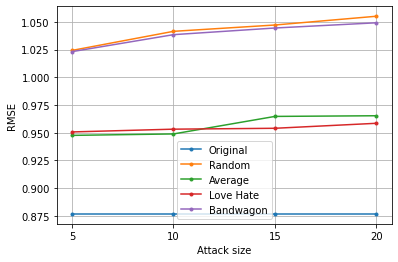

In [ ]:
rmsernd = [1.0242, 1.0414, 1.0471, 1.0550]
rmseavg = [ 0.9476, 0.9489,0.9647, 0.9653]
rmselh = [ 0.9507, 0.9532, 0.9540, 0.9585]
rmsebwg = [1.0231, 1.0384, 1.0444, 1.0491]
rmseog = [0.8768,0.8768,0.8768,0.8768]

import matplotlib.pyplot as plt
plt.plot(range(5,21,5),rmseog,label="Original",marker='.')
plt.plot(range(5,21,5),rmsernd,label="Random",marker='.')
plt.plot(range(5,21,5),rmseavg,label="Average",marker='.')
plt.plot(range(5,21,5),rmselh,label="Love Hate",marker='.')
plt.plot(range(5,21,5),rmsebwg,label="Bandwagon",marker='.')

plt.xticks([5,10,15,20])
plt.xlabel('Attack size')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.plot()

# **RMSE VS Filler size**

[]

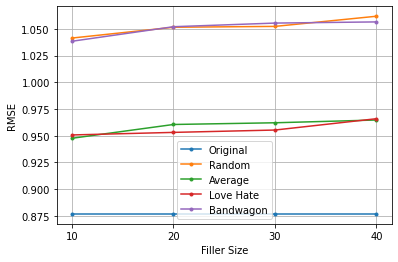

In [ ]:
rmsernd = [1.0414, 1.0515, 1.0523, 1.0618]
rmseavg = [0.9476, 0.9605, 0.9621, 0.9647]
rmselh = [0.9507, 0.9531, 0.9553, 0.9659]
rmsebwg = [1.0384, 1.0520, 1.0554, 1.0565]
rmseog = [0.8768,0.8768,0.8768,0.8768]

import matplotlib.pyplot as plt
plt.plot(range(10,41,10),rmseog,label="Original",marker='.')
plt.plot(range(10,41,10),rmsernd,label="Random",marker='.')
plt.plot(range(10,41,10),rmseavg,label="Average",marker='.')
plt.plot(range(10,41,10),rmselh,label="Love Hate",marker='.')
plt.plot(range(10,41,10),rmsebwg,label="Bandwagon",marker='.')

plt.xticks([10,20,30,40])
plt.xlabel('Filler Size')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.plot()

#**Prediction shift v/s filler size**

[]

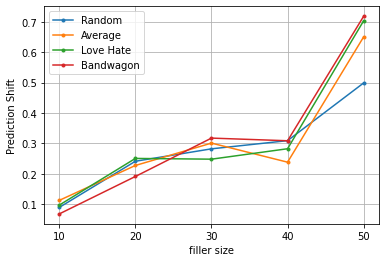

In [ ]:
pdsrnd = [0.08967122925971721,0.241315690255189,0.28212414579363004,0.3090727419333123,0.49863084970524674]
pdsavg = [0.11279801455929035,0.22745871457178604,0.30092989187261093,0.23829540738787217,0.650043153109495]
pdslh = [0.09725074258256408,0.25059158035338325,0.24816035633429911,0.2824457095900073,0.7029222792142874]
pdsbwg = [0.06828117306297292,0.1912894222265542,0.31740721329694094,0.3086438121198161,0.7178113842401411]

import matplotlib.pyplot as plt
plt.plot(range(10,51,10),pdsrnd,label="Random",marker='.')
plt.plot(range(10,51,10),pdsavg,label="Average",marker='.')
plt.plot(range(10,51,10),pdslh,label="Love Hate",marker='.')
plt.plot(range(10,51,10),pdsbwg,label="Bandwagon",marker='.')
plt.xticks([10,20,30,40,50])
plt.xlabel('filler size')
plt.ylabel('Prediction Shift')
plt.grid()
plt.legend()
plt.plot()

#**Prediction shift v/s attack size**

[]

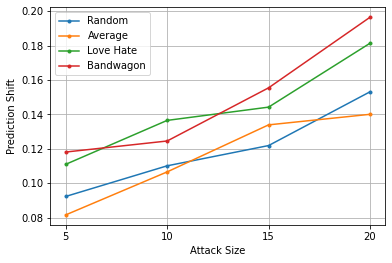

In [ ]:
pdsrnd = [0.0923554799853139,0.1101492082491049,0.12191649913459462,0.1531454239122215]
pdsavg = [0.0816359845942959,0.1066123566934103,0.133938959793621,0.1400671091953872]
pdslh = [0.11100426182606758,0.13652995318521302,0.14424018315170456,0.18135343356083672]
pdsbwg = [0.11815231145933892,0.12456378894035768,0.15544496311430445,0.1964445880027243]

import matplotlib.pyplot as plt
plt.plot(range(5,21,5),pdsrnd,label="Random",marker='.')
plt.plot(range(5,21,5),pdsavg,label="Average",marker='.')
plt.plot(range(5,21,5),pdslh,label="Love Hate",marker='.')
plt.plot(range(5,21,5),pdsbwg,label="Bandwagon",marker='.')
plt.xticks([5,10,15,20])
plt.xlabel('Attack Size')
plt.ylabel('Prediction Shift')
plt.grid()
plt.legend()
plt.plot()